# 4.1 Apply Image Augmentation on Images and Labels using Albumentations

## 4.1 Setup Albumentations Transform Pipeline

In [31]:
import albumentations as alb
import os
import time
import cv2
import json  
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

## checking the shape of image so that we can crop accordingly

In [6]:
img = cv2.imread(os.path.join('data','train','images','5e759492-19ec-11ed-a067-58fb84383140.jpg'))

In [7]:
img.shape

(480, 640, 3)

**Checkout the bounding box documentation and example of transformers here**[https://albumentations.ai/docs/getting_started/bounding_boxes_augmentation/](https://albumentations.ai/docs/getting_started/bounding_boxes_augmentation/)

In [2]:
augmentor = alb.Compose([alb.RandomCrop(width=450, height=450), 
                         alb.HorizontalFlip(p=0.5), 
                         alb.RandomBrightnessContrast(p=0.2),
                         alb.RandomGamma(p=0.2), 
                         alb.RGBShift(p=0.2), 
                         alb.VerticalFlip(p=0.5)], 
                       bbox_params=alb.BboxParams(format='albumentations', 
                                                  label_fields=['class_labels']))

## 4.2 Load a Test Image and Annotation with OpenCV and JSON

In [8]:
img = cv2.imread(os.path.join('data','train','images','5e759492-19ec-11ed-a067-58fb84383140.jpg'))

In [11]:
with open(os.path.join('data', 'train', 'labels', '5e759492-19ec-11ed-a067-58fb84383140.json'), 'r') as f:
    label = json.load(f)

In [12]:
label

{'version': '5.0.1',
 'flags': {},
 'shapes': [{'label': 'face',
   'points': [[128.47524752475246, 70.2871287128713],
    [314.61386138613864, 308.9009900990099]],
   'group_id': None,
   'shape_type': 'rectangle',
   'flags': {}}],
 'imagePath': '..\\images\\5e759492-19ec-11ed-a067-58fb84383140.jpg',
 'imageData': '/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCAHgAoADASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHS

In [13]:
type(label)

dict

In [14]:
label['shapes']

[{'label': 'face',
  'points': [[128.47524752475246, 70.2871287128713],
   [314.61386138613864, 308.9009900990099]],
  'group_id': None,
  'shape_type': 'rectangle',
  'flags': {}}]

In [15]:
label['shapes'][0]['points']

[[128.47524752475246, 70.2871287128713],
 [314.61386138613864, 308.9009900990099]]

## 4.3 Extract Coordinates and Rescale to Match Image Resolution

In [16]:
coords = [0,0,0,0]
coords[0] = label['shapes'][0]['points'][0][0]
coords[1] = label['shapes'][0]['points'][0][1]
coords[2] = label['shapes'][0]['points'][1][0]
coords[3] = label['shapes'][0]['points'][1][1]

In [17]:
coords

[128.47524752475246, 70.2871287128713, 314.61386138613864, 308.9009900990099]

In [20]:
coords = list(np.divide(coords, [640,480,640,480]))

In [21]:
coords

[0.20074257425742573,
 0.14643151815181518,
 0.49158415841584163,
 0.6435437293729372]

## 4.4 Apply Augmentations and View Results

In [22]:
augmented = augmentor(image=img, bboxes=[coords], class_labels=['face'])

In [23]:
augmented['bboxes'][0][2:]

(0.41469746974697475, 0.6442244224422442)

In [24]:
augmented['bboxes']

[(0.0010561056105610255,
  0.11397139713971399,
  0.41469746974697475,
  0.6442244224422442)]

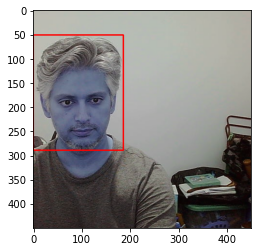

In [27]:
cv2.rectangle(augmented['image'], 
              tuple(np.multiply(augmented['bboxes'][0][:2], [450,450]).astype(int)),
              tuple(np.multiply(augmented['bboxes'][0][2:], [450,450]).astype(int)), 
                    (255,0,0), 2)

plt.imshow(augmented['image'])